In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv('train.csv')
display(df_train.shape, df_train.head())

(9557, 143)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
df_test = pd.read_csv('test.csv')
display(df_test.shape, df_test.head())

(23856, 142)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [4]:
df_train['Target'].dtype

dtype('int64')

## 1. Identify the output variable.

In [5]:
# the output variable is 'Target', and is an ordinal variable
# if it is oridinal each value then represents a level of severity
#1: Extreme Poverty
#2: Moderate Poverty
#3: Vulnerable Households
#4: Non Vulnerable Households

df_train['Target'].unique()

array([4, 2, 3, 1])

## 2. Understand the type of data.

In [6]:
df_train.shape

(9557, 143)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
df_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [9]:
df_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [10]:
df_train.select_dtypes(include=['object']).columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [11]:
df_train.loc[:, ['dependency', 'edjefe', 'edjefa']].head()

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no


In [12]:
df_test.loc[:, ['dependency', 'edjefe', 'edjefa']].head()

,dependency,edjefe,edjefa
0,.5,no,17
1,.5,no,17
2,.5,no,17
3,no,16,no
4,8,no,11


In [13]:
# replace 'yes' and 'no' with 1 and 0
mapping = {'yes': 1, 'no': 0}

for col in ['dependency', 'edjefa', 'edjefe']:
    df_train[col] = df_train[col].replace(mapping).astype(np.float64)
    df_test[col] = df_test[col].replace(mapping).astype(np.float64)

In [14]:
df_train.loc[:, ['dependency', 'edjefe', 'edjefa']].head()

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


In [15]:
df_test.loc[:, ['dependency', 'edjefe', 'edjefa']].head()

,dependency,edjefe,edjefa
0,0.5,0.0,17.0
1,0.5,0.0,17.0
2,0.5,0.0,17.0
3,0.0,16.0,0.0
4,8.0,0.0,11.0


## 3. Check if there are any biases in your dataset.

Target
1     755
2    1597
3    1209
4    5996
Name: Target, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

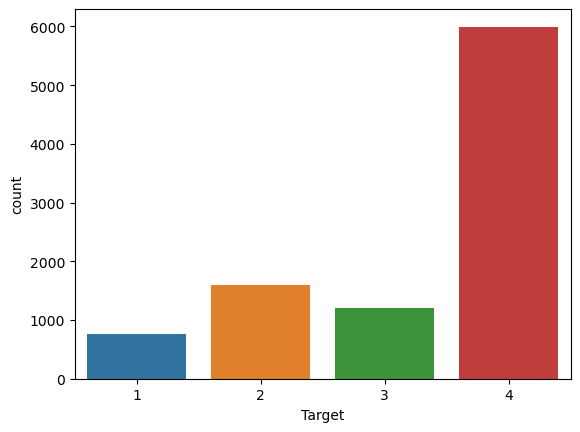

In [16]:
print(df_train.groupby('Target')['Target'].count())
sns.countplot(data=df_train, x='Target')

# dataset is clearly biased

In [17]:
from imblearn.over_sampling import RandomOverSampler

X_over, y_over = RandomOverSampler().fit_resample(df_train.drop('Target', axis=1), df_train['Target'])

In [18]:
df_train = pd.concat([X_over, y_over], axis=1)

Target
1    5996
2    5996
3    5996
4    5996
Name: Target, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

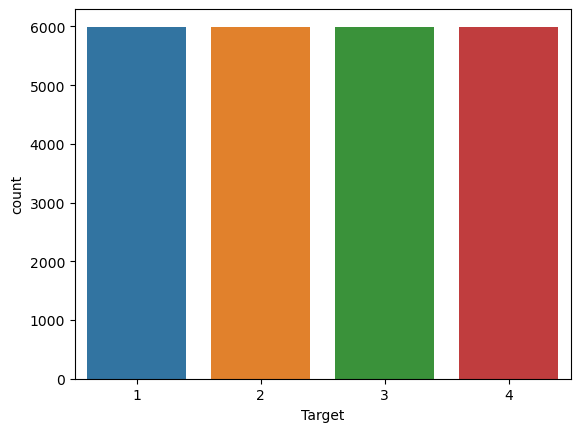

In [19]:
print(df_train.groupby('Target')['Target'].count())
sns.countplot(data=df_train, x='Target')

In [20]:
df_train['idhogar']

0        21eb7fcc1
1        0e5d7a658
2        2c7317ea8
3        2b58d945f
4        2b58d945f
           ...    
23979    f8c962870
23980    76241952e
23981    e235a4eec
23982    a0812ef17
23983    4b4b6f8df
Name: idhogar, Length: 23984, dtype: object

## 4. Check whether all members of the house have the same poverty level.

In [21]:
household_groups = df_train.groupby('idhogar')

household_same_poverty_level = 0
household_diff_poverty_level = 0

# iterate over each household group
for household_id, household_data in household_groups:
    # get the unique poverty levels within the household group
    unique_poverty_levels = household_data['Target'].dropna().unique()
    if len(unique_poverty_levels) > 1:
        # members of the household have different poverty levels
        household_diff_poverty_level += 1
        # print(f"Household {household_id} has members with different poverty levels.")
    else:
        # members of the household have the same poverty level
        household_same_poverty_level += 1
        # print(f"Household {household_id} has members with the same poverty level.")



In [22]:
print(f'Total number of households with same poverty level = {household_same_poverty_level}')
print(f'Total number of households with different poverty levels = {household_diff_poverty_level}')

Total number of households with same poverty level = 2903
Total number of households with different poverty levels = 85


## 5. Check if there is a house without a family head.

In [23]:
# Group the data by household ID
household_groups = df_train.groupby('idhogar')

num_households_with_no_family_head = 0

for household_id, household_data in household_groups:
  if (household_data['parentesco1'] == 1).sum() == 0:
    num_households_with_no_family_head += 1
    print(f"Household {household_id} has no family head.")

print('\n')
print(f'Total number of households with a family head = {num_households_with_no_family_head}')

Household 03c6bdf85 has no family head.
Household 09b195e7a has no family head.
Household 1367ab31d has no family head.
Household 1bc617b23 has no family head.
Household 374ca5a19 has no family head.
Household 61c10e099 has no family head.
Household 6b1b2405f has no family head.
Household 896fe6d3e has no family head.
Household a0812ef17 has no family head.
Household ad687ad89 has no family head.
Household b1f4d89d7 has no family head.
Household bfd5067c2 has no family head.
Household c0c8a5013 has no family head.
Household d363d9183 has no family head.
Household f2bfa75c4 has no family head.


Total number of households with a family head = 15


In [24]:
num_households = df_train['idhogar'].nunique()
print(f"There are {num_households} households in the dataset.")

There are 2988 households in the dataset.


In [25]:
df_train['parentesco1'].unique()

array([1, 0])

## 6. Set the poverty level of the members and the head of the house same in a family.

In [26]:
head_poverty_levels = df_train.loc[df_train['parentesco1'] == 1, ['idhogar', 'Target']].set_index('idhogar')['Target'].to_dict()
df_train['Target'] = df_train['idhogar'].map(head_poverty_levels)

## 7. Count how many null values are existing in columns.

In [27]:
df_test.isna().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 142, dtype: int64

In [28]:
df_train.columns[df_train.isna().any()]

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned', 'Target'], dtype='object')

In [29]:
df_train['v2a1']

0        190000.0
1        135000.0
2             NaN
3        180000.0
4        180000.0
           ...   
23979         NaN
23980         NaN
23981         NaN
23982         NaN
23983         NaN
Name: v2a1, Length: 23984, dtype: float64

In [30]:
df_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'Num of Unique'])

for i in range(0, len(df_train.columns)):
    df_info.loc[i] = [df_train.columns[i],
                 df_train[df_train.columns[i]].isna().sum(),
                 df_train[df_train.columns[i]].dtypes,
                 df_train[df_train.columns[i]].nunique()]
df_info

,Name of Col,Num of Null,Dtype,Num of Unique
0,Id,0,object,9557
1,v2a1,18110,float64,157
2,hacdor,0,int64,2
3,rooms,0,int64,11
4,hacapo,0,int64,2
...,...,...,...,...
138,SQBovercrowding,0,float64,38
139,SQBdependency,0,float64,31
140,SQBmeaned,5,float64,155
141,agesq,0,int64,97


In [31]:
df_info[df_info['Num of Null'] > 0]

,Name of Col,Num of Null,Dtype,Num of Unique
1,v2a1,18110,float64,157
8,v18q1,20376,float64,6
21,rez_esc,18971,float64,6
103,meaneduc,5,float64,155
140,SQBmeaned,5,float64,155
142,Target,99,float64,4


In [32]:
# show the percentage of missing values in each column
missing_val_per = round((df_train.isna().sum() / df_train.shape[0]) * 100)
missing_val_per

# print features that have more than 50% of missing values
missing_val_per[missing_val_per > 50]

v2a1       76.0
v18q1      85.0
rez_esc    79.0
dtype: float64

## 7b. Create a strategy to handle the missing vlaues

In [33]:
# this is the number of tablets in a household, in this case nan means 0
df_train['v18q1'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

In [34]:
# replace the missing values with 0
for data in [df_train, df_test]:
  data['v18q1'].fillna(0, inplace=True)

In [35]:
df_train['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [36]:
df_train['rez_esc'].isna().sum()

18971

In [37]:
for data in [df_train, df_test]:
    data['rez_esc'].fillna(0, inplace=True)

In [38]:
df_train['v2a1'].unique()

array([ 190000.,  135000.,      nan,  180000.,  130000.,  100000.,
         90000.,  215000.,  150000.,  120000.,   80000.,  168000.,
         40000.,  155000.,  200000.,  350000.,  270000.,  300000.,
        250000.,  260000.,  564834.,  175000.,   25310.,  400000.,
        450000.,  399378.,  119813.,  125518.,  125000.,   60000.,
         35000.,  160000.,  170000.,  500000.,  230000.,  185000.,
        220000.,  570540.,  342324.,       0.,  127000.,   52000.,
        240000.,  278000.,   70000.,  110000.,  100297.,  210000.,
        770229.,  285270.,  145000.,   96000.,  542013.,   65000.,
         85000.,  104000.,  275000.,  140000.,  280000.,  105661.,
         20000.,   16000.,   55000.,   30000.,  283000.,  245000.,
        191500.,  510000.,   36350.,   89000.,  600000.,   75000.,
         50000.,   84529.,  550000.,  132000.,  470000.,   27000.,
        176000.,  205000.,  380000.,  855810.,  427905.,  290975.,
        188000.,  118097.,  360000.,  325000., 1000000.,  7000

v2a1 - Monthly rent payment it looks related to tipovivi[i]<br><br>
tipovivi1 = own and fully paid house<br>
tipovivi2 = own, paying in installments<br>
tipovivi3 = rented<br>
tipovivi4 = precarious<br>
tipovivi5 = other(assigned, borrowed)<br>

In [39]:
data = df_train[df_train['v2a1'].isnull()].head(10)
data.loc[:,['v2a1', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']]

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,NaN,1,0,0,0,0
13,NaN,1,0,0,0,0
14,NaN,1,0,0,0,0
26,NaN,1,0,0,0,0
32,NaN,1,0,0,0,0
33,NaN,1,0,0,0,0
34,NaN,1,0,0,0,0
35,NaN,1,0,0,0,0
36,NaN,1,0,0,0,0
42,NaN,1,0,0,0,0


we can see that the nan values in 'v2a1' all coincide with 'tipovivi1'<br>
so we will replace them with 0, because if the house is owned<br>
no rent has to be paid

In [40]:
for data in [df_train, df_test]:
  data['v2a1'].fillna(0, inplace=True)

In [41]:
df_train['meaneduc'].unique()

array([10.        , 12.        , 11.        , 23.        ,  9.5       ,
       17.        , 13.5       , 10.333333  , 15.        ,  6.6666665 ,
        5.25      ,  7.        , 15.5       ,  9.        , 13.        ,
       14.        , 16.5       , 14.333333  ,  9.333333  ,  6.5       ,
        6.        ,  8.        ,  4.        , 11.5       , 12.75      ,
       12.5       ,  5.5       ,  7.7777777 ,  7.5       ,  4.5       ,
       11.333333  ,  6.25      , 16.        , 19.        ,  5.        ,
       12.25      ,  5.6666665 ,  9.666667  ,  2.        , 10.5       ,
       11.4       , 11.75      , 13.666667  ,  2.5       ,  8.666667  ,
        7.75      , 18.        , 14.5       ,  8.5       ,  1.        ,
        6.2857141 , 10.25      ,  3.5       ,  4.3333335 ,  8.333333  ,
       14.2       , 18.5       , 21.        ,  4.6666665 , 17.5       ,
        9.25      ,  9.75      ,  7.6666665 ,  8.6000004 , 15.666667  ,
       11.666667  ,  5.3333335 ,  6.75      , 10.6       ,  3.  

In [42]:
meaneduc_imputer = SimpleImputer(strategy='mean')

for data in [df_train, df_test]:
  data['meaneduc'] = meaneduc_imputer.fit_transform(data[['meaneduc']])

In [43]:
df_train['SQBmeaned'].unique()

array([1.0000000e+02, 1.4400000e+02, 1.2100000e+02, 5.2900000e+02,
       9.0250000e+01, 2.8900000e+02, 1.8225000e+02, 1.0677777e+02,
       2.2500000e+02, 4.4444443e+01, 2.7562500e+01, 4.9000000e+01,
       2.4025000e+02, 8.1000000e+01, 1.6900000e+02, 1.9600000e+02,
       2.7225000e+02, 2.0544444e+02, 8.7111107e+01, 4.2250000e+01,
       3.6000000e+01, 6.4000000e+01, 1.6000000e+01, 1.3225000e+02,
       1.6256250e+02, 1.5625000e+02, 3.0250000e+01, 6.0493824e+01,
       5.6250000e+01, 2.0250000e+01, 1.2844444e+02, 3.9062500e+01,
       2.5600000e+02, 3.6100000e+02, 2.5000000e+01, 1.5006250e+02,
       3.2111111e+01, 9.3444450e+01, 4.0000000e+00, 1.1025000e+02,
       1.2995999e+02, 1.3806250e+02, 1.8677779e+02, 6.2500000e+00,
       7.5111115e+01, 6.0062500e+01, 3.2400000e+02, 2.1025000e+02,
       7.2250000e+01, 1.0000000e+00, 3.9510201e+01, 1.0506250e+02,
       1.2250000e+01, 1.8777779e+01, 6.9444443e+01, 2.0164000e+02,
       3.4225000e+02, 4.4100000e+02, 2.1777777e+01, 3.0625000e

In [44]:
SQBmeaned_imputer = SimpleImputer(strategy='mean')

for data in [df_train, df_test]:
  data['SQBmeaned'] = SQBmeaned_imputer.fit_transform(data[['SQBmeaned']])

dropping the squared columns

In [45]:
cols = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
        'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

for data in [df_train, df_test]:
  data.drop(cols, axis=1, inplace=True)

## 7c. Check if the columns for v2a1 and rez_esc are significantly important,<br> if they don't drop them since they have a large amount of missing values.

In [46]:
def dist_plot(feature, title, xlabel):
  fig = plt.figure(figsize=(10, 10))

  sns.displot(feature, kde=True, bins=50)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.show()

<Figure size 1000x1000 with 0 Axes>

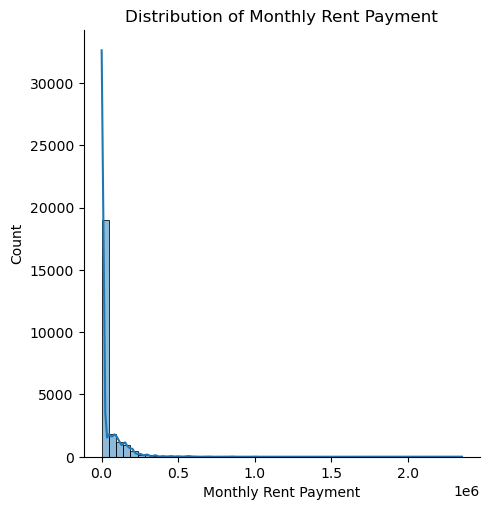

In [47]:
dist_plot(df_train['v2a1'], 'Distribution of Monthly Rent Payment', 'Monthly Rent Payment')

<Figure size 1000x1000 with 0 Axes>

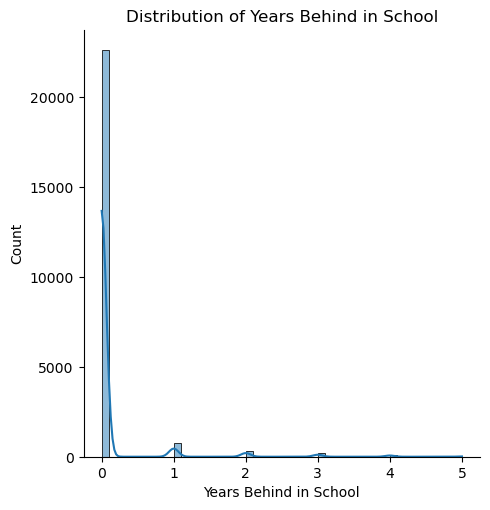

In [48]:
dist_plot(df_train['rez_esc'], 'Distribution of Years Behind in School', 'Years Behind in School')

### Data for both 'v2a1' and 'rez_esc' is not normally distributed. So we opt for kruskal-wallis test

In [49]:
from scipy.stats import kruskal

X1 = df_train[['v2a1']]
X2 = df_train[['rez_esc']]
y = df_train['Target']

H1, pval1 = kruskal(X1[y==1], X1[y==2], X1[y==3], X1[y==4])
H2, pval2 = kruskal(X2[y==1], X2[y==2], X2[y==3], X2[y==4])

if pval1 < 0.05:
  print('The Kruskal-Wallis test for v2a1 is statistically significant. Reject the null hypothesis. ')
else:
  print('The Kruskal-Wallis test for v2a1 is not statistically significant. Fail to reject the null hypothesis.')

if pval2 < 0.05:
  print('The Kruskal-Wallis test for rez_esc is statistically significant. Reject the null hypothesis. ')
else:
  print('The Kruskal-Wallis test for rez_esc is not statistically significant. Fail to reject the null hypothesis.')


The Kruskal-Wallis test for v2a1 is statistically significant. Reject the null hypothesis. 
The Kruskal-Wallis test for rez_esc is statistically significant. Reject the null hypothesis. 


## 8. Remove null value rows of the target variable.

In [50]:
# drop rows in target column that have NaN values
df_train = df_train.dropna(subset=['Target'])
df_train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1,0,0,0,0,0,1,0,43,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,1,0,0,0,0,0,1,0,67,4.0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,1,0,0,0,0,0,1,0,92,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,1,0,0,0,0,0,1,0,17,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1,0,0,0,0,0,1,0,37,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23978,ID_1d3e84fcc,32000.0,0,4,0,1,1,0,0.0,0,...,0,0,0,0,0,1,1,0,20,3.0
23979,ID_83d3b1276,0.0,0,1,0,1,1,0,0.0,0,...,1,0,0,0,0,0,1,0,45,3.0
23980,ID_7586d1c63,0.0,0,4,0,1,1,0,0.0,0,...,1,0,0,0,0,0,1,0,75,3.0
23981,ID_938d043f0,0.0,0,4,0,1,1,0,0.0,1,...,0,0,0,0,0,1,0,1,6,2.0


In [51]:
df_train.isna().sum().sum()
# show the columns that still have miussing values  
df_train.columns[df_train.isna().any()]

df_train['meaneduc'].unique()

array([10.        , 12.        , 11.        , 23.        ,  9.5       ,
       17.        , 13.5       , 10.333333  , 15.        ,  6.6666665 ,
        5.25      ,  7.        , 15.5       ,  9.        , 13.        ,
       14.        , 16.5       , 14.333333  ,  9.333333  ,  6.5       ,
        6.        ,  8.        ,  4.        , 11.5       , 12.75      ,
       12.5       ,  5.5       ,  7.7777777 ,  7.5       ,  4.5       ,
       11.333333  ,  6.25      , 16.        , 19.        ,  5.        ,
       12.25      ,  5.6666665 ,  9.666667  ,  2.        , 10.5       ,
       11.4       , 11.75      , 13.666667  ,  2.5       ,  8.666667  ,
        7.75      , 18.        , 14.5       ,  8.5       ,  1.        ,
        6.2857141 , 10.25      ,  3.5       ,  4.3333335 ,  8.333333  ,
       14.2       , 18.5       , 21.        ,  4.6666665 , 17.5       ,
        9.25      ,  9.75      ,  7.6666665 ,  8.6000004 , 15.666667  ,
       11.666667  ,  5.3333335 ,  6.75      , 10.6       ,  3.  

In [52]:
df_train.isna().sum().sum()

0

## 9. Predict the accuracy using random forest classifier.

In [53]:
# give me the object columns
df_train.select_dtypes(include='object').columns

Index(['Id', 'idhogar'], dtype='object')

In [54]:
corr = df_train.corr(numeric_only=True)

In [55]:
# select the upper triangle of the correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [56]:
dropped_features = []
for col in upper.columns:
  if any(abs(upper[col]) > 0.95):
    dropped_features.append(col)

dropped_features

['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'area2']

we are also dropping 'male', 'Id' and 'idhogar' because they are not useful for our model

In [57]:
[dropped_features.append(items) for items in ['Id', 'idhogar', 'male']]

dropped_features

['tamhog',
 'hhsize',
 'coopele',
 'female',
 'hogar_total',
 'area2',
 'Id',
 'idhogar',
 'male']

In [58]:
df_train_copy = df_train.drop(dropped_features, axis=1)
df_test_copy = df_test.drop(dropped_features, axis=1)

In [59]:
X = df_train_copy.drop(['Target'], axis=1)
y = df_train_copy['Target']


train_data, val_data, train_target, val_target = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=50, min_samples_leaf=4, max_features='sqrt')
rfc.fit(train_data, train_target)

train_score = rfc.score(train_data, train_target)
val_score = rfc.score(val_data, val_target)

print("Test {} Train {} RS {}".format(val_score,train_score,i))

if val_score > train_score:
  print("Test {} Train {} RS {}".format(val_score,train_score,i))

Test 0.9838810969227548 Train 0.9965982834414905 RS 142


In [60]:
val_predict = rfc.predict(val_data)

In [61]:
confusion_matrix(val_target, val_predict)

array([[1197,    0,    0,    0],
       [   0, 1202,    0,   23],
       [   0,    0, 1174,   11],
       [   5,   30,    8, 1127]])

In [62]:
print(classification_report(val_target, val_predict))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1197
         2.0       0.98      0.98      0.98      1225
         3.0       0.99      0.99      0.99      1185
         4.0       0.97      0.96      0.97      1170

    accuracy                           0.98      4777
   macro avg       0.98      0.98      0.98      4777
weighted avg       0.98      0.98      0.98      4777



### Predictions on the test data

In [63]:
test_predict = rfc.predict(df_test_copy)
df_test_copy['Target'] = test_predict

## 10. Check the accuracy using a random forest with cross-validation.

In [64]:
kfold = KFold(n_splits=10, random_state=142, shuffle=True)
print(cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy'))

[0.9886982  0.98953537 0.98744244 0.99288405 0.99120971 0.98994975
 0.99329983 0.99036851 0.99288107 0.98911223]


In [65]:
print(cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy').mean())

0.990538116843461
